#IMPORTAR LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# Configuraciones de Matplotlib
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
!pip install --upgrade seaborn


#CARDA DE DATOS

In [ ]:
df2= pd.read_excel('/content/Data_final.xlsx')

In [ ]:
# Supongamos que tienes un DataFrame llamado 'data' con las columnas originales que deseas cambiar de nombre.

# Define una lista con los nuevos nombres de las columnas
nuevos_nombres = [
    'Cedula',
    'Genero',
    'BenMayor60',
    'Activo',
    'CargosPen',
    'Antiguedad',
    'LineaTelf',
    'HogarMulNivel',
    'TipoConexion',
    'RevTecnica',
    'IntervencionRep',
    'SoporteEnLinea',
    'ServicioDeMedia',
    'ServicioPaquetes',
    'TipoDeAfiliacion',
    'EnvioFactEmail',
    'FormaDePago',
    'RecargoExtraMes',
    'RecargosExtraPaquetes',
    'Churn'
]

# Asigna los nuevos nombres a las columnas
df2.columns = nuevos_nombres

# Verificar los cambios
print(df2.columns)


Index(['Cedula', 'Genero', 'BenMayor60', 'Activo', 'CargosPen', 'Antiguedad',
       'LineaTelf', 'HogarMulNivel', 'TipoConexion', 'RevTecnica',
       'IntervencionRep', 'SoporteEnLinea', 'ServicioDeMedia',
       'ServicioPaquetes', 'TipoDeAfiliacion', 'EnvioFactEmail', 'FormaDePago',
       'RecargoExtraMes', 'RecargosExtraPaquetes', 'Churn'],
      dtype='object')


In [ ]:
df3=df2.copy()

# ANALSIS EXPLOARAORIO INICIAL

##ESTADISITCOS BASICOS


In [ ]:
print('cabezera del df------------------\n',df3.head())
print('info del df------------------------\n',df3.info())
print('describe del df---------------------------\n',df3.describe())
print('nulos del df------------------\n',df3.isna().sum())
print('duplicados del df------------------\n',df3.duplicated().sum())

cabezera del df------------------
       Cedula Genero BenMayor60 Activo CargosPen  Antiguedad LineaTelf  \
0   22996891      F         No    Yes        No          16        No   
1    7117263      M         No     No        No           7       Yes   
2  765300704      M         No     No        No          16       Yes   
3  217628564      M         No     No        No           6        No   
4  692483033      F         No     No        No          13       Yes   

   HogarMulNivel  TipoConexion RevTecnica IntervencionRep SoporteEnLinea  \
0  No especifica         Cobre         No              No             No   
1             No         Cobre        Yes             Yes             No   
2             No         Cobre        Yes              No             No   
3  No especifica         Cobre        Yes             Yes            Yes   
4             No  Fibra optica         No              No             No   

  ServicioDeMedia ServicioPaquetes TipoDeAfiliacion EnvioFactEmail  \

In [ ]:
# NO SE TOMO ENCUENTA EL CEDULA YA NO ES NECASARIO
df3 = df3.drop(['Cedula'], axis = 1)

print('\n\n-------------------------------')
print(df3.dtypes)





-------------------------------
Genero                    object
BenMayor60                object
Activo                    object
CargosPen                 object
Antiguedad                 int64
LineaTelf                 object
HogarMulNivel             object
TipoConexion              object
RevTecnica                object
IntervencionRep           object
SoporteEnLinea            object
ServicioDeMedia           object
ServicioPaquetes          object
TipoDeAfiliacion          object
EnvioFactEmail            object
FormaDePago               object
RecargoExtraMes          float64
RecargosExtraPaquetes    float64
Churn                     object
dtype: object


## ANALSIS DE NULOS

In [ ]:
print('\n\n------- NULOS ------------')
print(df3.isnull().sum())

import numpy as np

# after convertion 'TotalCharges' has 11 missing values

tempNaN = df3[np.isnan(df3['RecargosExtraPaquetes'])]



------- NULOS ------------
Genero                    0
BenMayor60                0
Activo                    0
CargosPen                 0
Antiguedad                0
LineaTelf                 0
HogarMulNivel             0
TipoConexion              0
RevTecnica                0
IntervencionRep           0
SoporteEnLinea            0
ServicioDeMedia           0
ServicioPaquetes          0
TipoDeAfiliacion          0
EnvioFactEmail            0
FormaDePago               0
RecargoExtraMes           0
RecargosExtraPaquetes    11
Churn                     0
dtype: int64


In [ ]:
media_recargos = df3['RecargosExtraPaquetes'].mean()


In [ ]:
df3['RecargosExtraPaquetes'].fillna(media_recargos, inplace=True)


In [ ]:
df3['RecargosExtraPaquetes'].isnull().sum()


0

In [ ]:
tempTen = df3[df3['Antiguedad'] == 0]

##RECOFICASION DE VARIBALES

In [ ]:
cols = ['Genero','BenMayor60','Activo', 'CargosPen', \
            'LineaTelf', 'EnvioFactEmail', 'Churn']

df3[cols] = df3[cols].astype('category')
print('\n\n-------------------------------')
print(df3.dtypes)

# label encoding for categorical data candidates
for columns in cols:
    df3[columns] = df3[columns].cat.codes



-------------------------------
Genero                   category
BenMayor60               category
Activo                   category
CargosPen                category
Antiguedad                  int64
LineaTelf                category
HogarMulNivel              object
TipoConexion               object
RevTecnica                 object
IntervencionRep            object
SoporteEnLinea             object
ServicioDeMedia            object
ServicioPaquetes           object
TipoDeAfiliacion           object
EnvioFactEmail           category
FormaDePago                object
RecargoExtraMes           float64
RecargosExtraPaquetes     float64
Churn                    category
dtype: object


In [ ]:
df3.head()

,Genero,BenMayor60,Activo,CargosPen,Antiguedad,LineaTelf,HogarMulNivel,TipoConexion,RevTecnica,IntervencionRep,SoporteEnLinea,ServicioDeMedia,ServicioPaquetes,TipoDeAfiliacion,EnvioFactEmail,FormaDePago,RecargoExtraMes,RecargosExtraPaquetes,Churn
0,0,0,1,0,16,0,No especifica,Cobre,No,No,No,No,No,Mes-causado,1,PSE,30.563777,30.410437,0
1,1,0,0,0,7,1,No,Cobre,Yes,Yes,No,No,No,Año-servicio,0,Punto Fisico,57.567161,1888.864335,0
2,1,0,0,0,16,1,No,Cobre,Yes,No,No,No,No,Mes-causado,1,Punto Fisico,54.562459,108.757381,1
3,1,0,0,0,6,0,No especifica,Cobre,Yes,Yes,Yes,No,No,Año-servicio,0,Transferencia Bancaria,42.078165,1840.648386,0
4,0,0,0,0,13,1,No,Fibra optica,No,No,No,No,No,Mes-causado,1,PSE,70.237137,151.835494,1


# EXPLORACION DE DATOS

## ANALISIS DE VARIABLES PRINICPALES

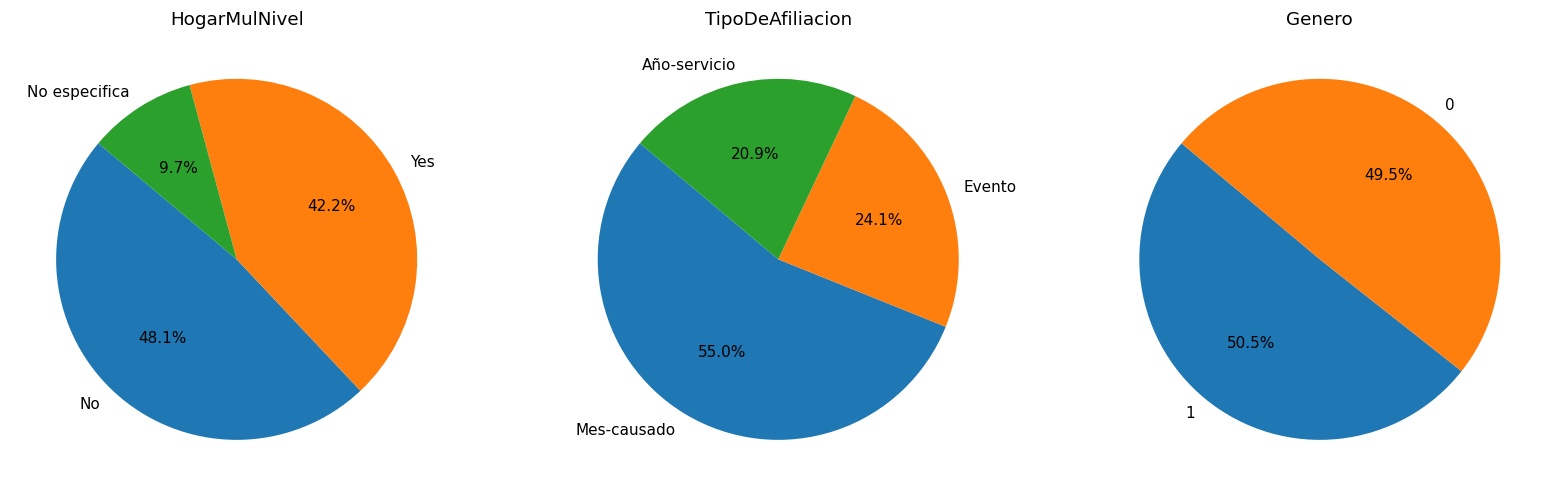

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


conteo_hogar_mul_nivel = df3['HogarMulNivel'].value_counts()
conteo_tipo_de_afiliacion = df3['TipoDeAfiliacion'].value_counts()
conteo_genero = df3['Genero'].value_counts()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


axes[0].pie(conteo_hogar_mul_nivel, labels=conteo_hogar_mul_nivel.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('HogarMulNivel')


axes[1].pie(conteo_tipo_de_afiliacion, labels=conteo_tipo_de_afiliacion.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('TipoDeAfiliacion')

axes[2].pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Genero')

plt.show()


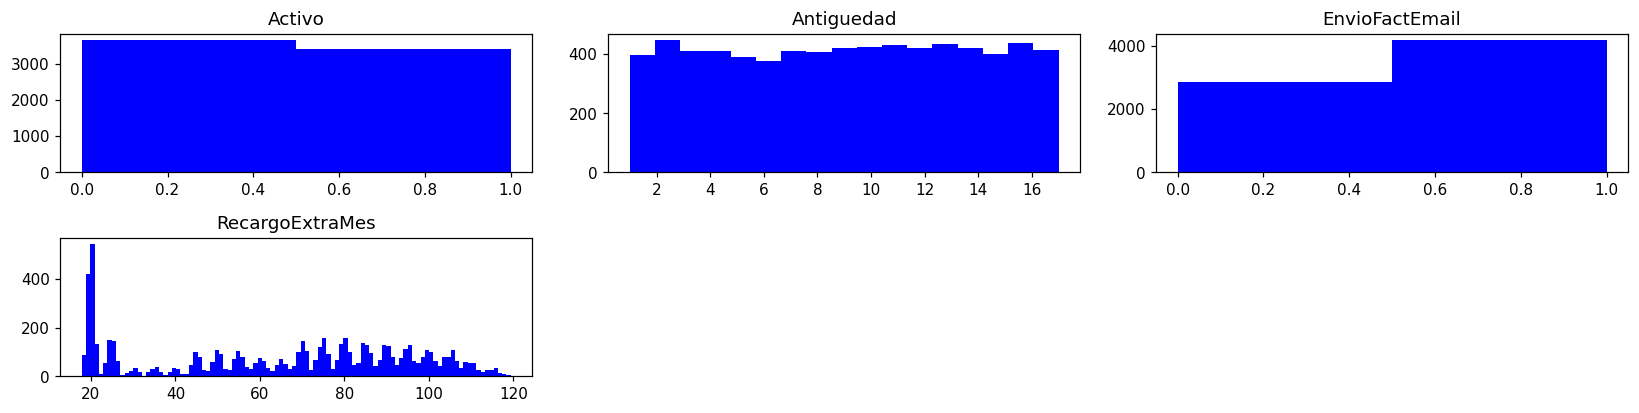

In [ ]:
ds_histograms = df3[['Activo',
       'Antiguedad', 'EnvioFactEmail',
        'RecargoExtraMes']]

fig1 = plt.figure(1, figsize=(15, 12))
for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    vals = np.size(ds_histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(ds_histograms.iloc[:, i], bins=vals, color = 'blue')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

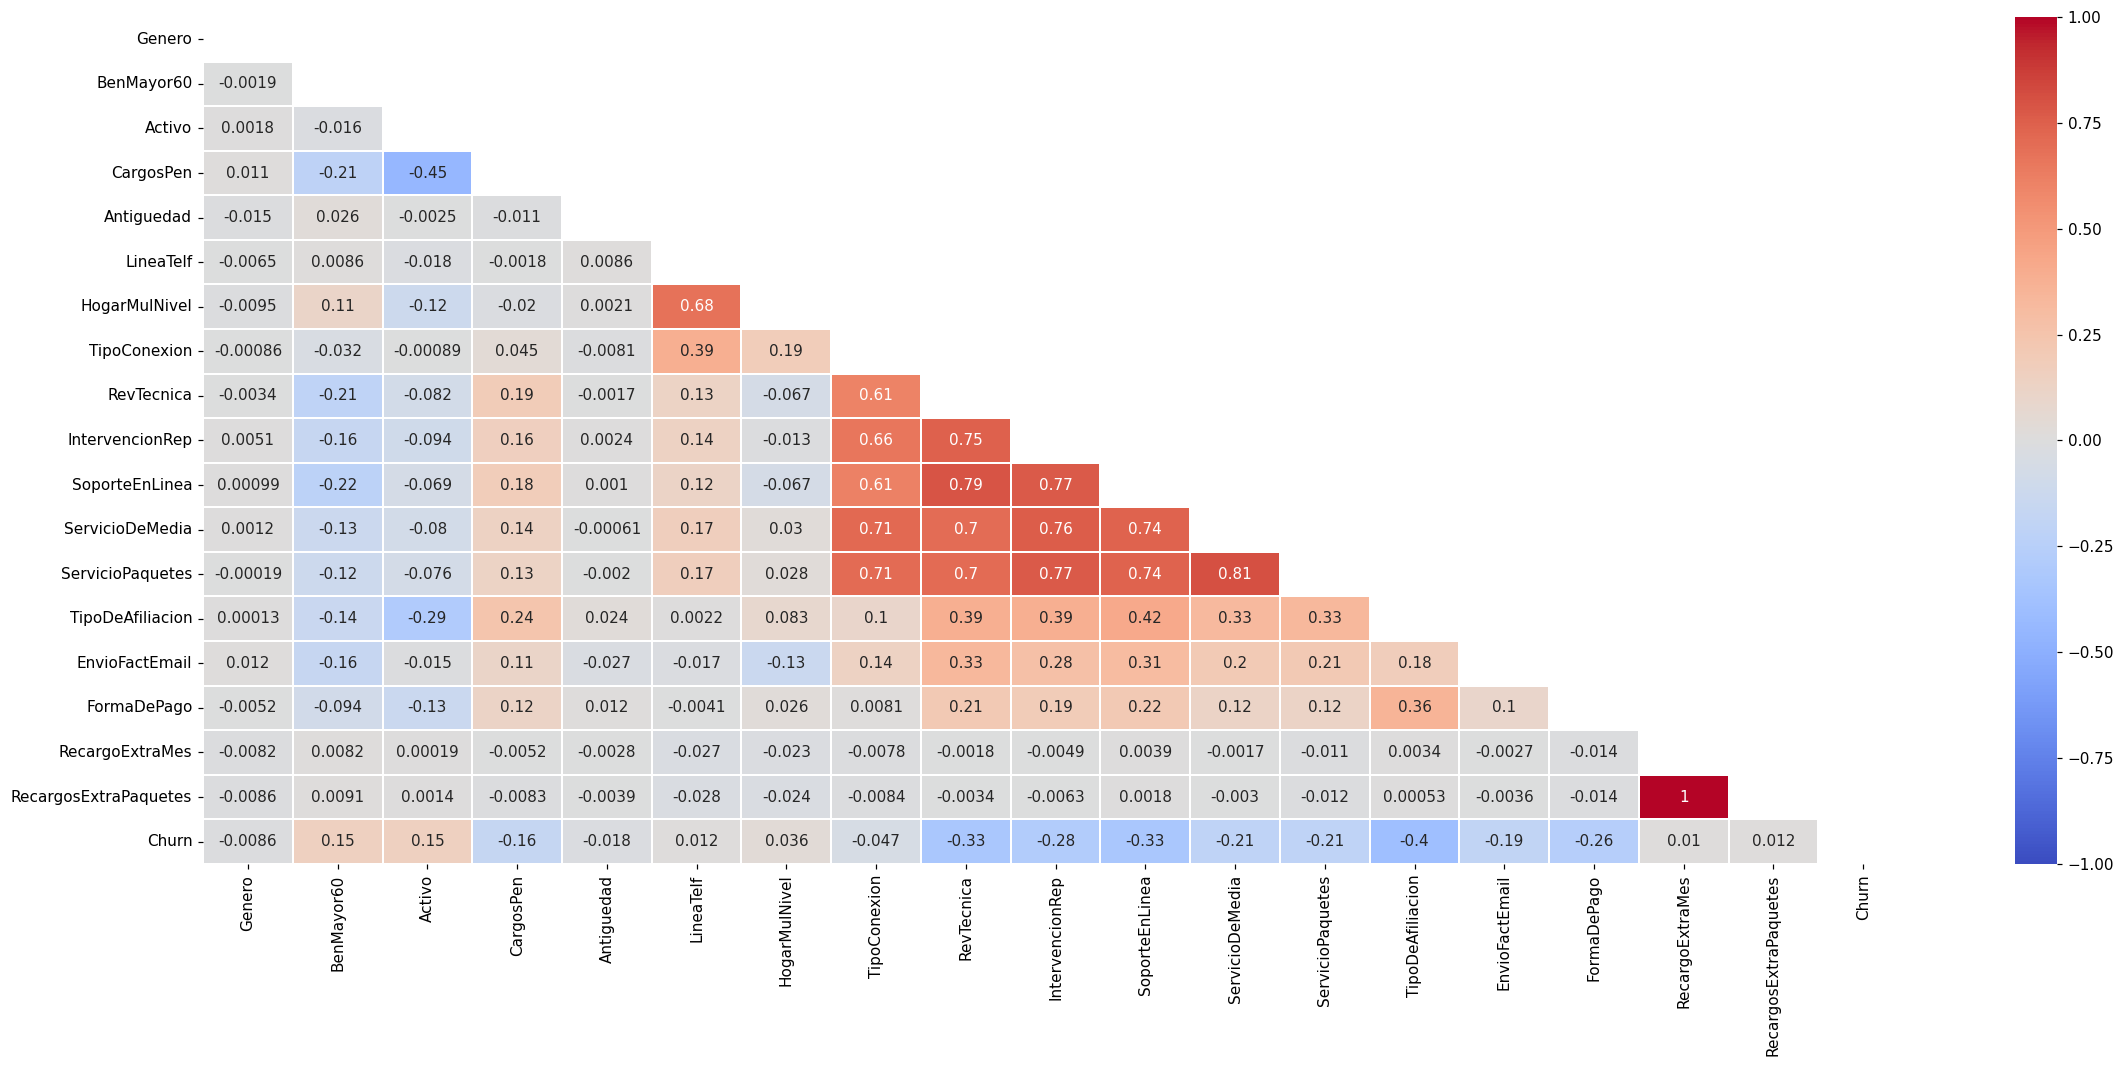

In [ ]:
plt.figure(5, figsize=(25, 10))
corr = df3.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
dataset = df3.copy()
dataset = pd.get_dummies(dataset)

In [ ]:
dataset.head()

,Genero,BenMayor60,Activo,CargosPen,Antiguedad,LineaTelf,EnvioFactEmail,RecargoExtraMes,RecargosExtraPaquetes,Churn,...,ServicioPaquetes_No,ServicioPaquetes_No especifica,ServicioPaquetes_Yes,TipoDeAfiliacion_Año-servicio,TipoDeAfiliacion_Evento,TipoDeAfiliacion_Mes-causado,FormaDePago_PSE,FormaDePago_Punto Fisico,FormaDePago_Transferencia Bancaria,FormaDePago_pago por cuotas
0,0,0,1,0,16,0,1,30.563777,30.410437,0,...,1,0,0,0,0,1,1,0,0,0
1,1,0,0,0,7,1,0,57.567161,1888.864335,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,16,1,1,54.562459,108.757381,1,...,1,0,0,0,0,1,0,1,0,0
3,1,0,0,0,6,0,0,42.078165,1840.648386,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,13,1,1,70.237137,151.835494,1,...,1,0,0,0,0,1,1,0,0,0


## ANALISIS DE NEGOCIO

SE TOMAN LA VARAIBLES  MAS RELAVNTES QUE DAN UN IDEA DE COMO ESTA LOS CLIENTES DE EMCALI CON RESPECTO A SU SALIDA O EN ESTE CASO LA VARIAVLE (CLASE)

##RELACIO DE CALSE CON REINCIDENCIA

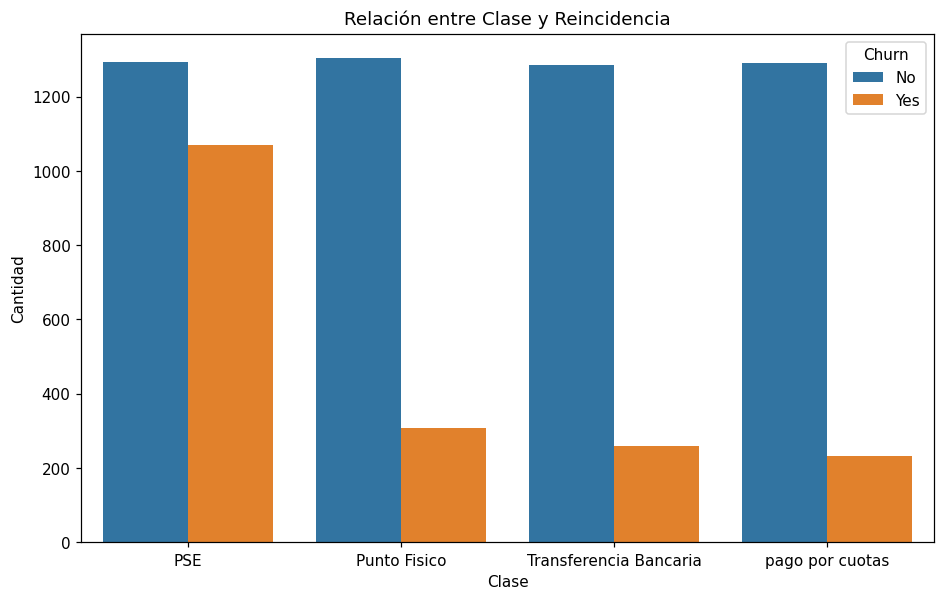

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(hue="Churn", x="FormaDePago", data=df3)
plt.title("Relación entre Clase y Reincidencia")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

## RELACION ENTRE CLASE Y TIPO DE CLIENTE

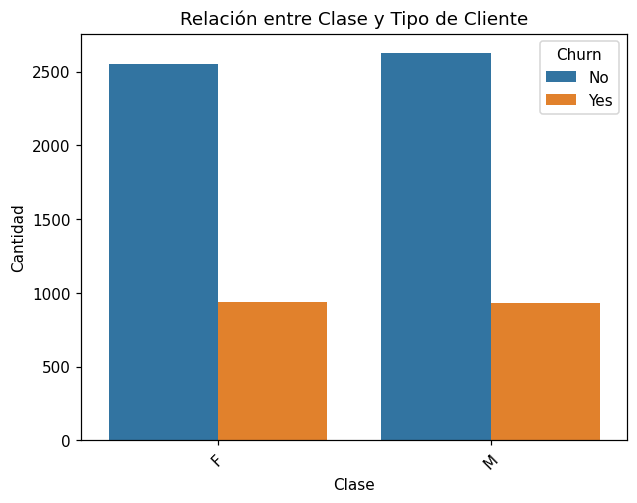

In [ ]:
sns.countplot(hue="Churn", x="Genero", data=df3)
plt.title("Relación entre Clase y Tipo de Cliente")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

RELACION CLASE Y TIPO DE CONTRATO

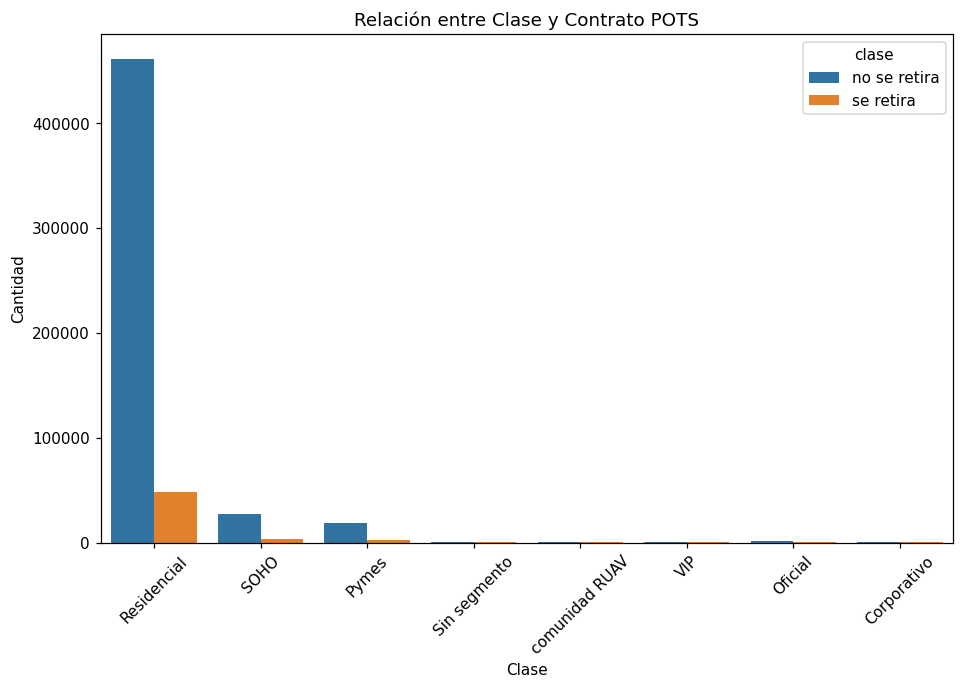

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(hue="clase", x="contrato_pots", data=df3)
plt.title("Relación entre Clase y Contrato POTS")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


## RELACION ENTRE CLAE Y CAUSA DE LA FALLA

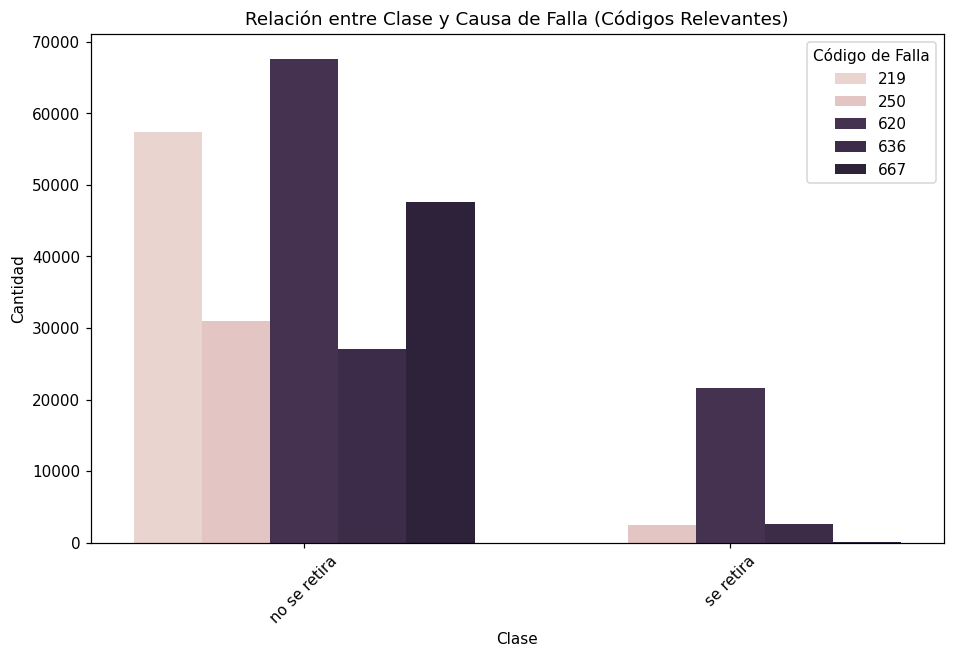

In [ ]:
frecuencia_codigos = df3['cod_causa_falla'].value_counts()

# Paso 2: Identificar los códigos de falla más frecuentes (por ejemplo, los 5 más frecuentes)
num_codigos_relevantes = 5  # Puedes ajustar este número según tus necesidades
codigos_relevantes = frecuencia_codigos.head(num_codigos_relevantes).index.tolist()

# Paso 3: Filtrar el DataFrame para incluir solo las filas con los códigos de falla más relevantes
df_relevante = df3[df3['cod_causa_falla'].isin(codigos_relevantes)]

# Paso 4: Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x="clase", hue="cod_causa_falla", data=df_relevante)
plt.title("Relación entre Clase y Causa de Falla (Códigos Relevantes)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Código de Falla")
plt.show()

##RELACIÓN ENTRE ZONA, REINCIDENCIA Y CLASE


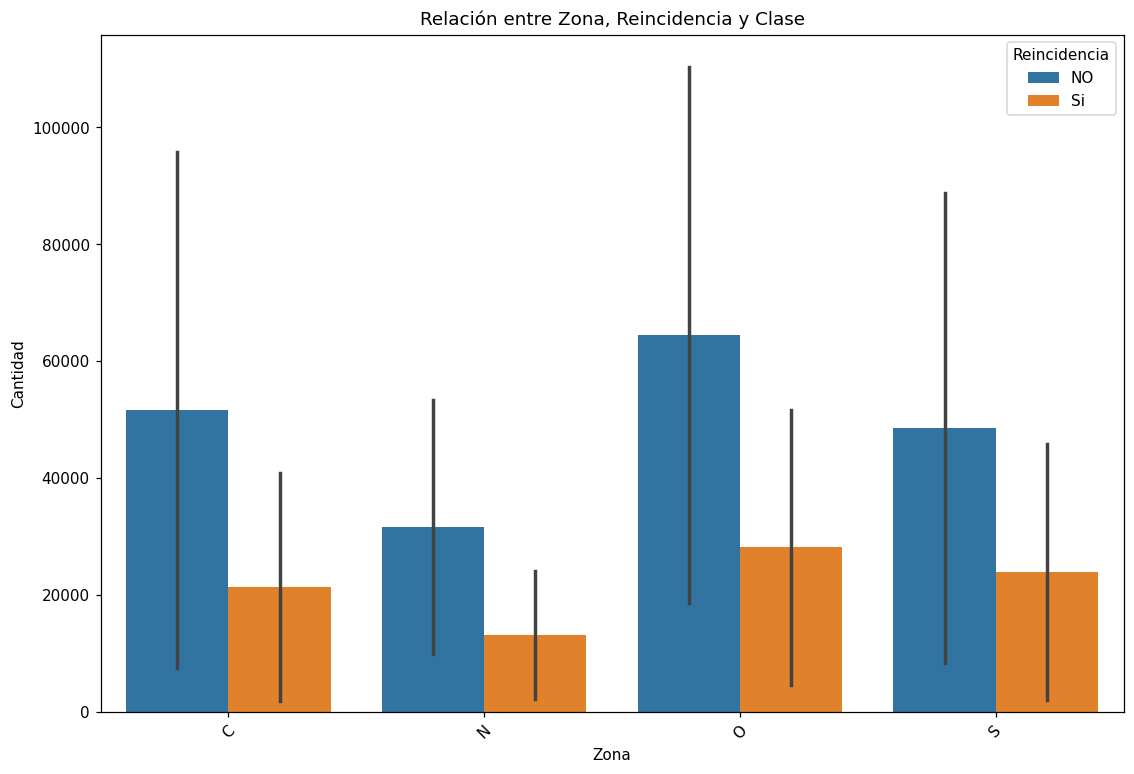

In [ ]:
df_grouped = df3.groupby(['zona_cod', 'reincidencia', 'clase']).size().reset_index(name='count')

# Crea el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(x='zona_cod', y='count', hue='reincidencia', data=df_grouped)
plt.title("Relación entre Zona, Reincidencia y Clase")
plt.xlabel("Zona")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Reincidencia")
plt.show()

##RELACIÓN ENTRE PLAN POTS Y CLASE (PLANES RELEVANTES)

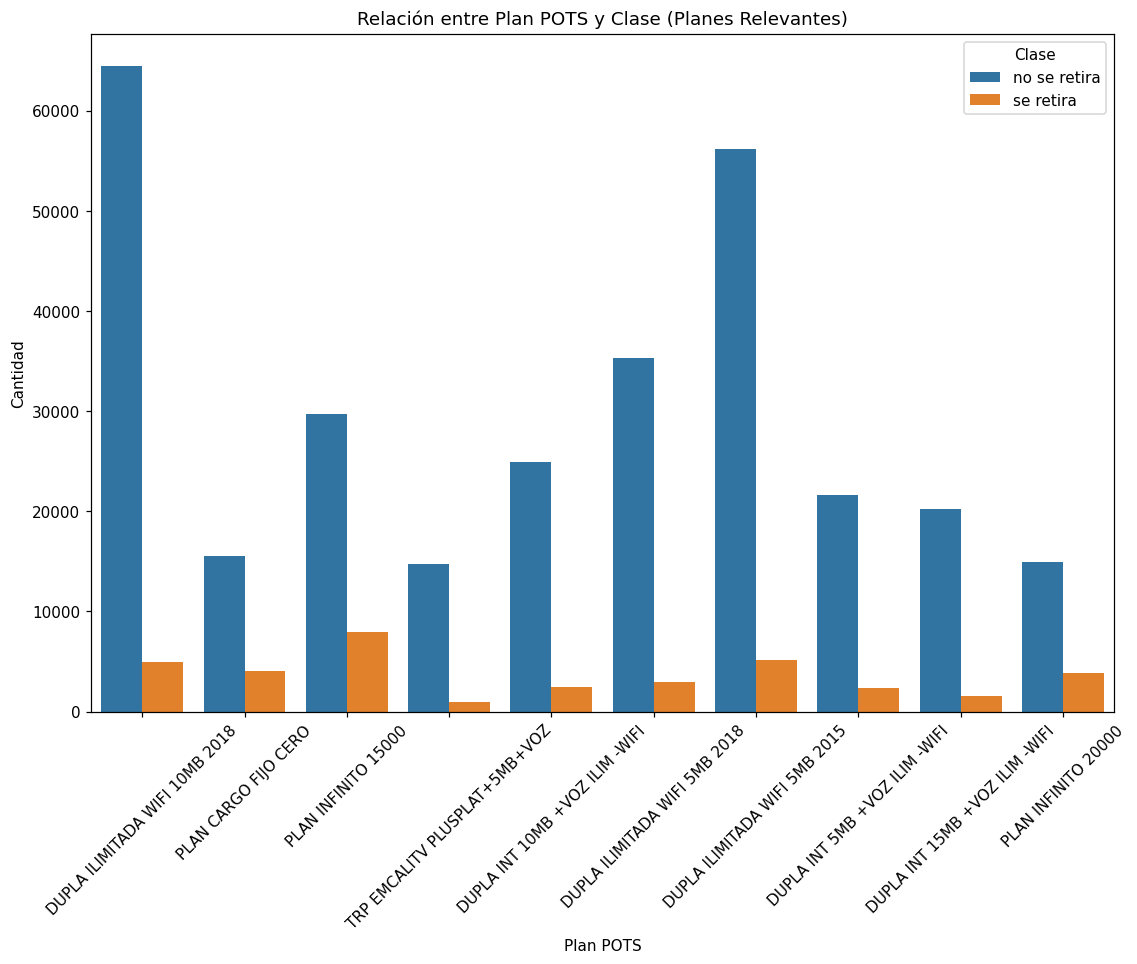

In [ ]:
num_planes_relevantes = 10# Puedes ajustar este número según tus necesidades
planes_relevantes = df3['plan_pots'].value_counts().head(num_planes_relevantes).index.tolist()

# Filtra el DataFrame para incluir solo las filas con los planes POTS más comunes
df_relevante = df3[df3['plan_pots'].isin(planes_relevantes)]

# Crea el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.countplot(x='plan_pots', hue='clase', data=df_relevante)
plt.title("Relación entre Plan POTS y Clase (Planes Relevantes)")
plt.xlabel("Plan POTS")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Clase")
plt.show()

##DISTRIBUCIÓN DE DÍAS TRANSCURRIDOS POR CLASE

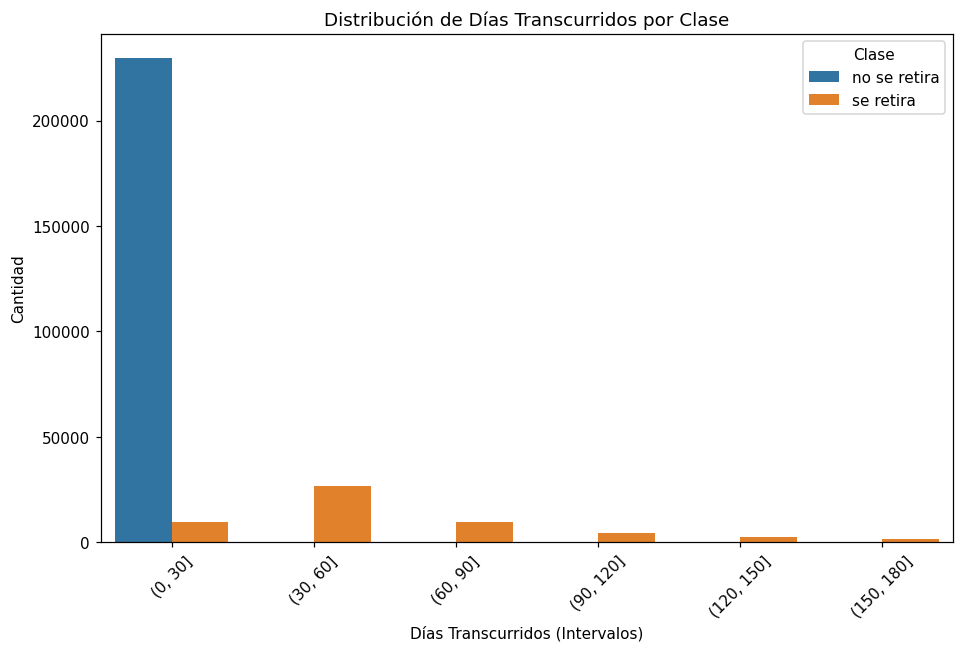

In [ ]:
# Discretiza la columna "total_dias_transcurridos" en intervalos
bins = [0, 30, 60, 90, 120, 150, 180]
df3['dias_transcurridos_intervalos'] = pd.cut(df3['total_dias_transcurridos'], bins=bins)

plt.figure(figsize=(10, 6))
sns.countplot(x="dias_transcurridos_intervalos", hue="clase", data=df3)
plt.title("Distribución de Días Transcurridos por Clase")
plt.xlabel("Días Transcurridos (Intervalos)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Clase")
plt.show()

CLASIFICASION  DE VARIABLES

CATEGORICAS

In [ ]:
columnas_categoricas = df2.select_dtypes(include=['object']).columns

for columna in columnas_categoricas:
  recuento_valores = df2[columna].value_counts()
  print(f"Recuento de valores únicos en la columna '{columna}':")
  print(recuento_valores)
  print()

Recuento de valores únicos en la columna 'zona_cod':
O    185500
C    146110
S    145081
N     89628
Name: zona_cod, dtype: int64

Recuento de valores únicos en la columna 'reincidencia':
NO    392898
Si    173421
Name: reincidencia, dtype: int64

Recuento de valores únicos en la columna 'tipo_cliente':
Hogares        557060
Corporativo      9259
Name: tipo_cliente, dtype: int64

Recuento de valores únicos en la columna 'plan_pots':
DUPLA ILIMITADA WIFI 10MB 2018               69348
DUPLA ILIMITADA WIFI 5MB 2015                61336
DUPLA ILIMITADA WIFI 5MB 2018                38252
PLAN INFINITO 15000                          37688
DUPLA INT 10MB +VOZ ILIM -WIFI               27384
                                             ...  
DPL WIFI 1 M MIGRADO 2 M                         1
DPL BA 100MB+VOZ ILIM -WIFI-22                   1
PLAN INFINITO 45000 + FPC                        1
DUPLA BA ILIMITADA WIFI 2000K 200 MIN VOZ        1
WIFI FUNCIONARIOS ILIMIT 2500                    1
Na

VARIABLES NUMERICAS

In [ ]:
columnas_numericas = df2.select_dtypes(include=['int64']).columns
print(columnas_numericas )

Index(['id', 'cod_naturaleza_reclamo', 'estrato', 'cod_causa_falla',
       'total_dias_transcurridos'],
      dtype='object')


#REGRECION LOGISTICA

 los resultados de la clasificación indican que el modelo de regresión logística tiene un rendimiento excelente en la mayoría de las métricas, con alta precisión, recall y F1-Score en ambas clases. El alto valor de precisión global (accuracy) también indica que el modelo es capaz de hacer predicciones precisas en general. Sin embargo, se debe tener en cuenta que el desequilibrio de clases puede afectar estas métricas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)  # Puedes ajustar los hiperparámetros según tus necesidades
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(classification_rep)


Precisión del modelo: 81.76%
Matriz de Confusión:
[[932 104]
 [153 220]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



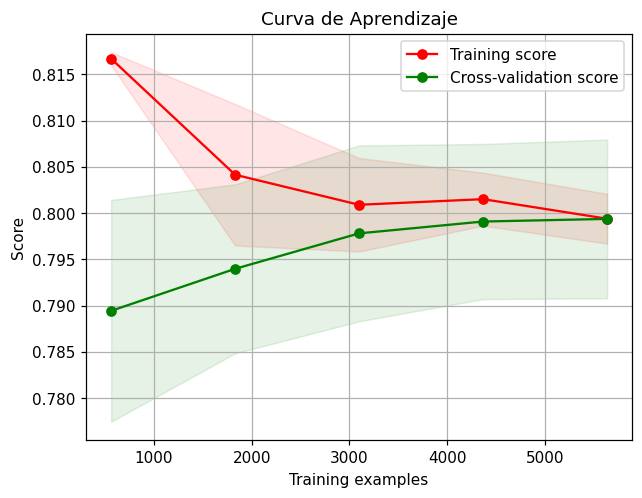

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Creación y entrenamiento del modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
plot_learning_curve(modelo, "Curva de Aprendizaje", X, y, cv=5)
plt.show()


## GRAFICA ROC

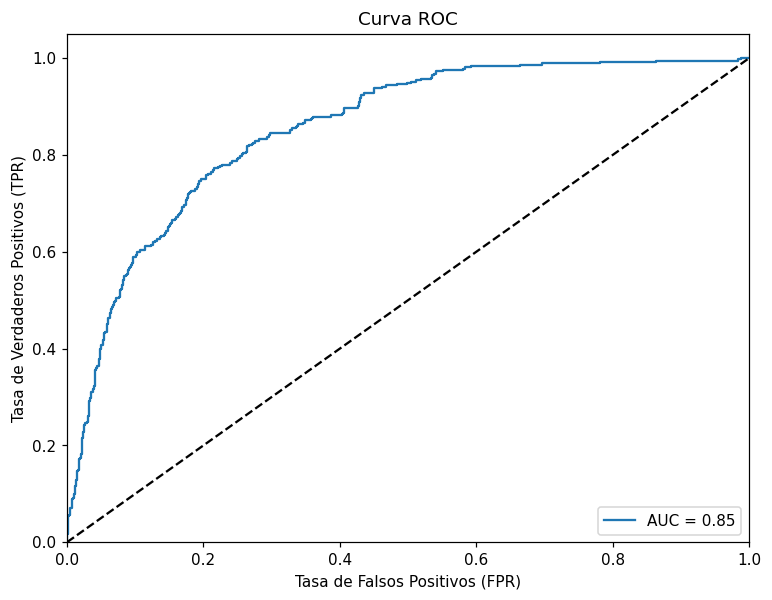

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcula las probabilidades de predicción
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

# Calcula la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Visualiza la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

##MATRIZ DE CONFUSION

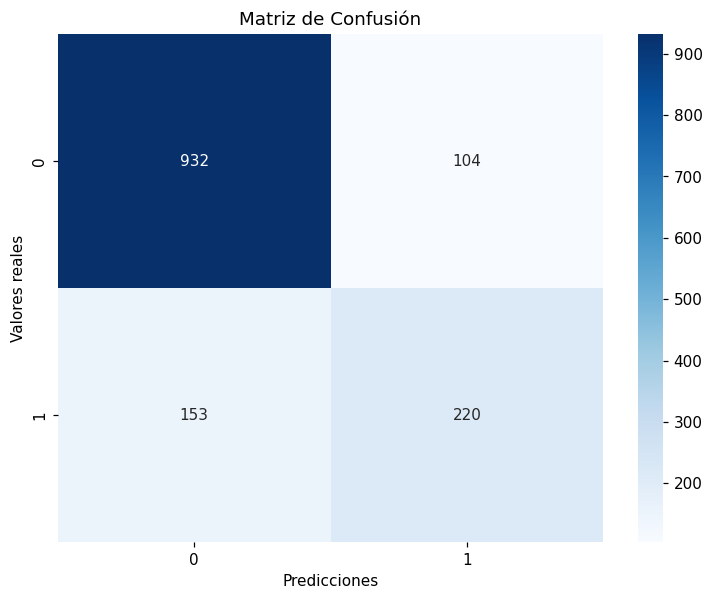

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtén las predicciones del modelo
y_pred = modelo.predict(X_test)

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


#NAIVE BAYES

los resultados del informe de clasificación indican que el modelo Naive Bayes tiene un rendimiento excelente en la mayoría de las métricas, con alta precisión, recall y F1-Score en ambas clases. El alto valor de precisión global (accuracy) también indica que el modelo es capaz de hacer predicciones precisas en general.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Creación y entrenamiento del modelo Naive Bayes (GaussianNB)
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(classification_rep)



Precisión del modelo: 69.77%
Matriz de Confusión:
[[662 374]
 [ 52 321]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1036
           1       0.46      0.86      0.60       373

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.72      1409



##MATRIZ DE CONFUNSION

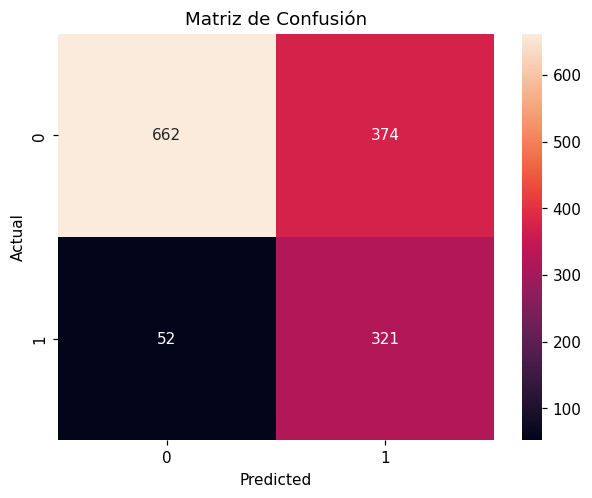

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


#KNN

El modelo KNN tiene una alta precisión para la clase 0 (casos negativos), lo que significa que es bueno para predecir casos negativos. Sin embargo, tiene un bajo recall para la clase 1 (casos positivos), lo que indica que tiene dificultades para identificar correctamente casos positivos. Esto sugiere que el modelo podría estar sesgado hacia la clase mayoritaria (clase 0) y no es tan efectivo para detectar casos positivos. La puntuación F1 promedio ponderada es del 91%, lo que indica un rendimiento general decente del modelo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creación y entrenamiento del modelo KNN
modelo = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según tus necesidades
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(classification_rep)


Precisión del modelo: 78.00%
Matriz de Confusión:
[[925 111]
 [199 174]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1036
           1       0.61      0.47      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



##TRAING RATE

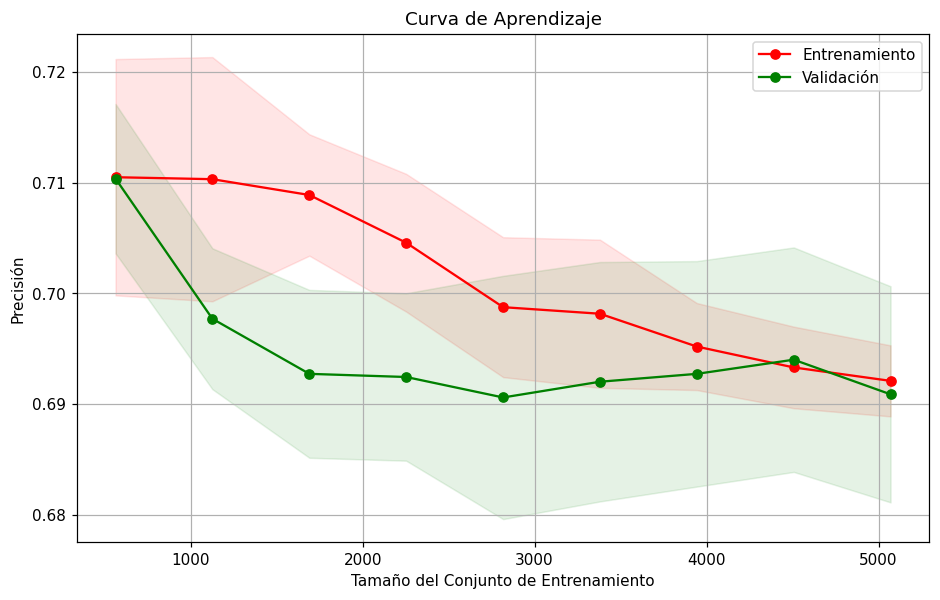

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define una función para plotear la curva de aprendizaje
def plot_learning_curve(modelo, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Precisión")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")

    plt.legend(loc="best")

    return plt

# Define los tamaños de conjunto de entrenamiento que deseas evaluar
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Crea la gráfica de learning rate
plot_learning_curve(modelo, X, y, cv=5, train_sizes=train_sizes)

plt.show()


##GRAFICA ROC

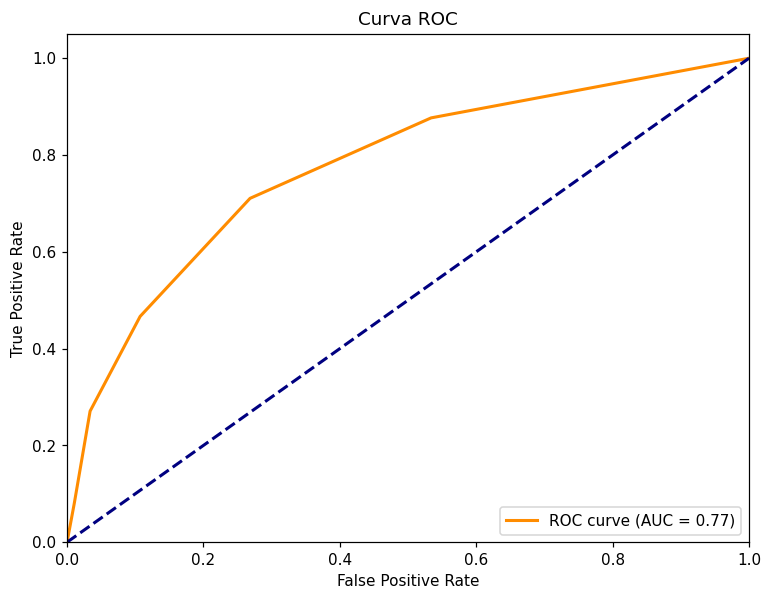

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea una instancia del modelo KNN
modelo = KNeighborsClassifier(n_neighbors=5)  # Ajusta el número de vecinos según tus necesidades

# Ajusta el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Obtiene las probabilidades de predicción
y_scores = modelo.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


##MATRIZ

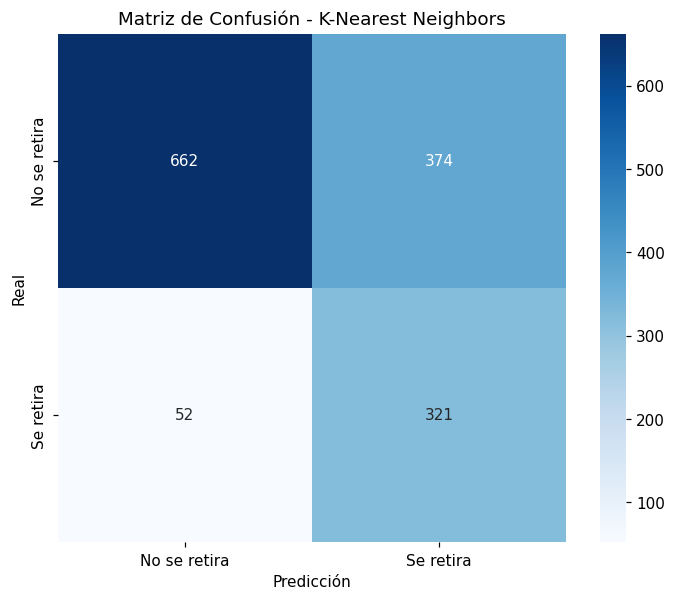

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=["No se retira", "Se retira"],
            yticklabels=["No se retira", "Se retira"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.show()


#LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Crear una instancia del modelo LDA
lda = LinearDiscriminantAnalysis()

# Ajustar el modelo LDA a tus datos de entrenamiento
lda.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lda = lda.predict(X_test)

# Evaluar el modelo LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
classification_rep_lda = classification_report(y_test, y_pred_lda)

# Imprimir resultados del modelo LDA
print(f"Precisión del modelo LDA: {accuracy_lda * 100:.2f}%")
print("Matriz de Confusión (LDA):")
print(conf_matrix_lda)
print("Informe de Clasificación (LDA):")
print(classification_rep_lda)


Precisión del modelo LDA: 80.98%
Matriz de Confusión (LDA):
[[918 118]
 [150 223]]
Informe de Clasificación (LDA):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.65      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
# Calcular la tasa de entrenamiento
training_rate = 1 - accuracy_lda

print(f"Tasa de Entrenamiento del modelo LDA: {training_rate * 100:.2f}%")


Tasa de Entrenamiento del modelo LDA: 19.02%


##MATRIZ DE CONFUSION

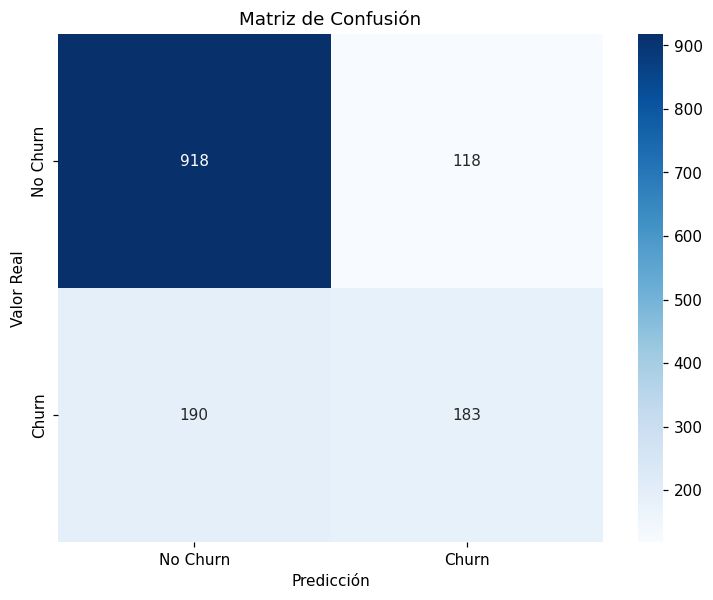

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


##GRAFICA ROC

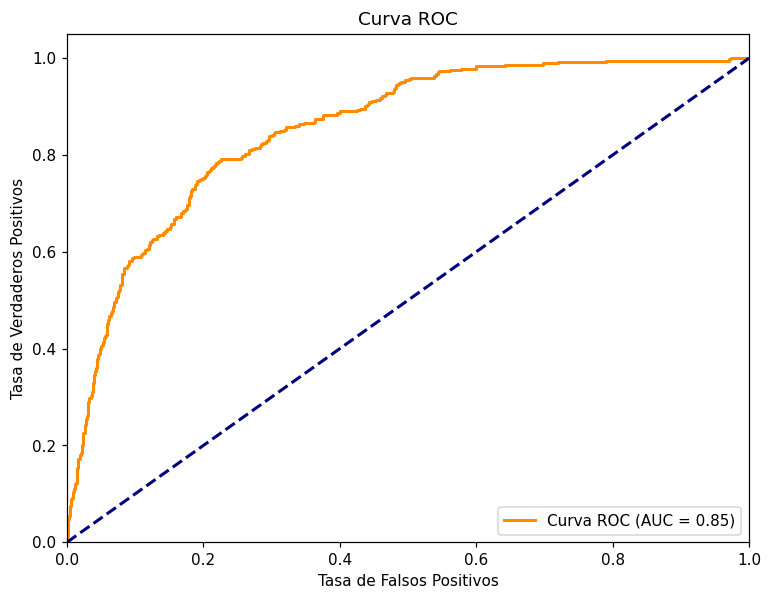

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtén las probabilidades de clase positiva del modelo LDA
y_prob_lda = lda.predict_proba(X_test)[:, 1]

# Calcula la puntuación AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob_lda)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#XGBOOST

 modelo XGBoost ha demostrado un rendimiento impresionante en términos de precisión y capacidad de clasificación, pero es importante llevar a cabo una validación cruzada y una evaluación más detallada para asegurarse de que este rendimiento se mantenga en datos no vistos y para verificar si hay sobreajuste.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creación y entrenamiento del modelo XGBoost
modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(classification_rep)



Precisión del modelo: 78.14%
Matriz de Confusión:
[[918 118]
 [190 183]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



##MATRIZ

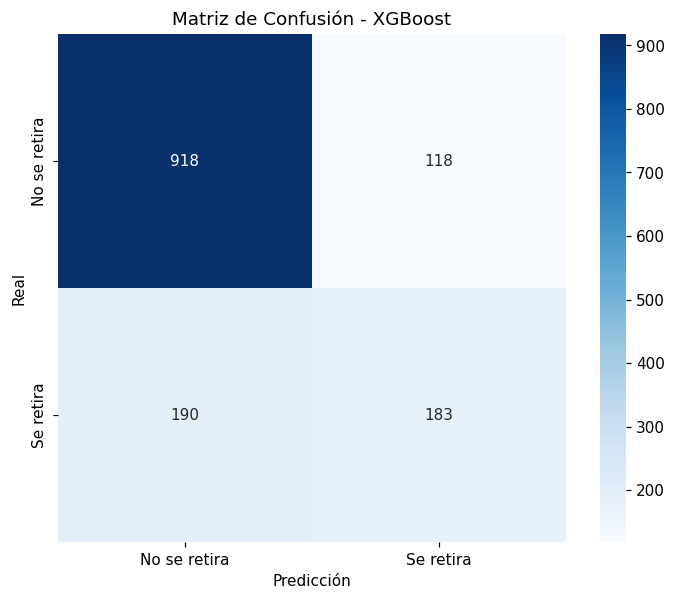

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=["No se retira", "Se retira"],
            yticklabels=["No se retira", "Se retira"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()


##GRAFICA ROC

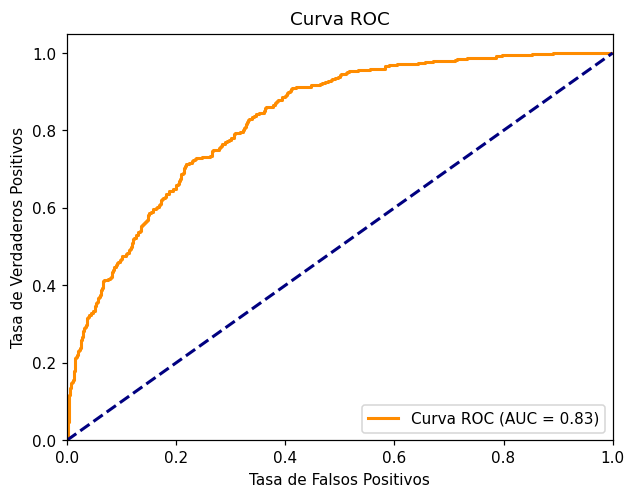

Valor de AUC: 0.83


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calcular el valor de AUC
roc_auc_score_value = roc_auc_score(y_test, y_pred_proba)
print(f"Valor de AUC: {roc_auc_score_value:.2f}")


#RED NUERONAL SIMPLE

La red neuronal parece haber aprendido bastante bien los casos negativos (clase 0), ya que muestra una alta precisión y recall para esta clase.

Sin embargo, tiene dificultades para identificar correctamente los casos positivos (clase 1), como se refleja en el bajo recall del 5%. Esto significa que el modelo tiende a perder muchos casos positivos.

La puntuación F1 para la clase 1 es baja (0.09), lo que indica un rendimiento deficiente en la clasificación de esta clase. Esto podría deberse a un desequilibrio en la distribución de clases o a la necesidad de ajustar los hiperparámetros del modelo.



Epoch 1/20
124/124 [==============================] - 5s 15ms/step - loss: 6.7885 - accuracy: 0.6523 - val_loss: 0.7243 - val_accuracy: 0.7658
Epoch 2/20
124/124 [==============================] - 1s 8ms/step - loss: 0.9348 - accuracy: 0.6898 - val_loss: 0.6707 - val_accuracy: 0.6511
Epoch 3/20
124/124 [==============================] - 2s 13ms/step - loss: 0.7037 - accuracy: 0.7198 - val_loss: 0.5304 - val_accuracy: 0.7871
Epoch 4/20
124/124 [==============================] - 1s 10ms/step - loss: 0.6276 - accuracy: 0.7474 - val_loss: 0.5778 - val_accuracy: 0.7794
Epoch 5/20
124/124 [==============================] - 1s 9ms/step - loss: 0.6875 - accuracy: 0.7365 - val_loss: 0.5458 - val_accuracy: 0.7782
Epoch 6/20
124/124 [==============================] - 0s 4ms/step - loss: 0.6142 - accuracy: 0.7484 - val_loss: 0.5230 - val_accuracy: 0.7865
Epoch 7/20
124/124 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.7644 - val_loss: 0.5634 - val_accuracy: 0.7853
Epo

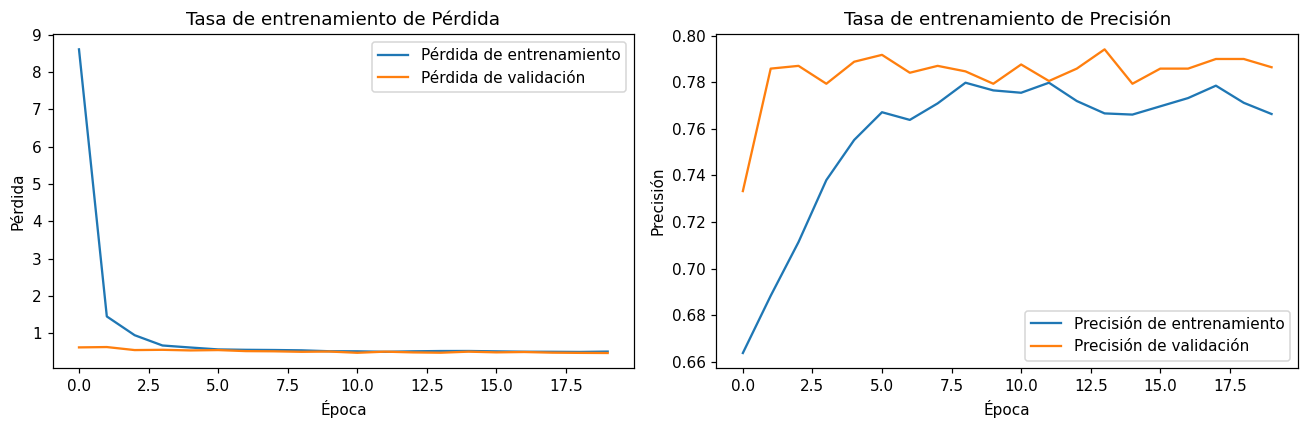

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creación y entrenamiento de la red neuronal
modelo = keras.Sequential([
     layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Agregar dropout para regularización
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3)

# Predicciones en el conjunto de prueba
y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(classification_rep)


# Crear gráfica de la tasa de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Pérdida de entrenamiento')
plt.plot(validation_loss, label='Pérdida de validación')
plt.title('Tasa de entrenamiento de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Precisión de entrenamiento')
plt.plot(validation_accuracy, label='Precisión de validación')
plt.title('Tasa de entrenamiento de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()









##MATRIZ

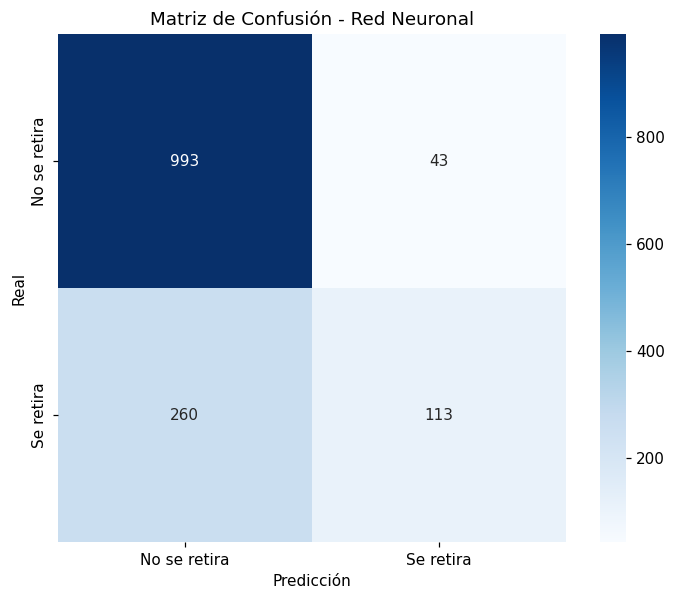

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes el modelo de red neuronal entrenado y las predicciones
# en y_pred

# Calcula la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=["No se retira", "Se retira"],
            yticklabels=["No se retira", "Se retira"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()